In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

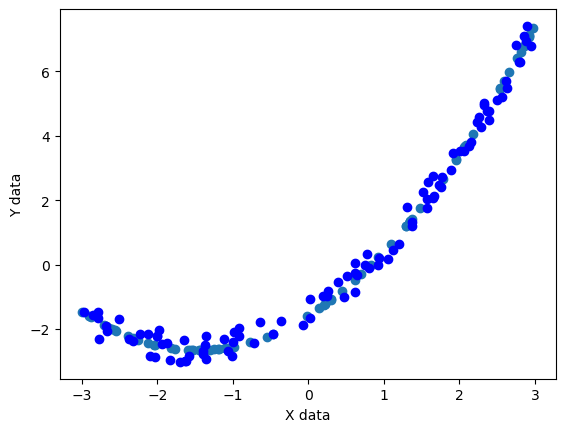

In [63]:
# creating dataset and plotting scatter plot
x=6*np.random.rand(100,1)-3
y=0.5*x**2+1.5*x-2+np.random.rand(100,1)
plt.scatter(x,y,color='blue')
plt.xlabel('X data')
plt.ylabel('Y data')
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [65]:
# implementing simple linear regression
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()
regression_1.fit(x_train,y_train)

LinearRegression()

In [66]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression_1.predict(x_test))
score

0.8367792114265405

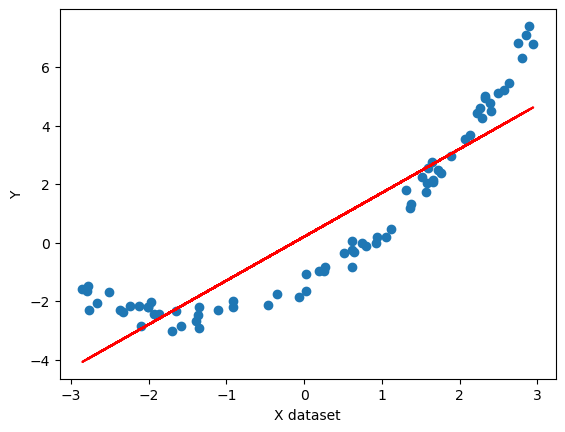

In [67]:
# visualizing module
plt.plot(x_train,regression_1.predict(x_train),color='red')
plt.scatter(x_train,y_train)
plt.xlabel('X dataset')
plt.ylabel('Y')
plt.show()

In [68]:
# implementing polynomial rgeression
from sklearn.preprocessing import PolynomialFeatures

In [69]:
poly=PolynomialFeatures(degree=2,include_bias=True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)


In [70]:
x_train_poly

array([[ 1.00000000e+00,  1.72640928e+00,  2.98048901e+00],
       [ 1.00000000e+00,  1.64714106e+00,  2.71307366e+00],
       [ 1.00000000e+00,  2.49418180e+00,  6.22094284e+00],
       [ 1.00000000e+00, -1.35232096e+00,  1.82877199e+00],
       [ 1.00000000e+00,  1.51843973e+00,  2.30565921e+00],
       [ 1.00000000e+00,  2.79970507e+00,  7.83834848e+00],
       [ 1.00000000e+00,  2.06988291e-02,  4.28441526e-04],
       [ 1.00000000e+00, -2.78018070e+00,  7.72940475e+00],
       [ 1.00000000e+00, -1.11185701e+00,  1.23622601e+00],
       [ 1.00000000e+00,  2.22798692e+00,  4.96392572e+00],
       [ 1.00000000e+00, -1.37129949e+00,  1.88046229e+00],
       [ 1.00000000e+00, -2.12881399e+00,  4.53184898e+00],
       [ 1.00000000e+00,  9.32384934e-01,  8.69341665e-01],
       [ 1.00000000e+00, -1.97599702e+00,  3.90456424e+00],
       [ 1.00000000e+00, -2.00924140e+00,  4.03705099e+00],
       [ 1.00000000e+00,  2.33148662e+00,  5.43582984e+00],
       [ 1.00000000e+00, -2.77099248e+00

In [71]:
# seeing accuracy wrt polynomial regression
regression_2=LinearRegression()
regression_2.fit(x_train_poly,y_train)
y_predict=regression_2.predict(x_test_poly)
scoree=r2_score(y_test,y_predict)
scoree

0.9923177655071607

In [72]:
regression_2.coef_

array([[0.        , 1.46373569, 0.49146943]])

In [73]:
regression_2.intercept_

array([-1.45754901])

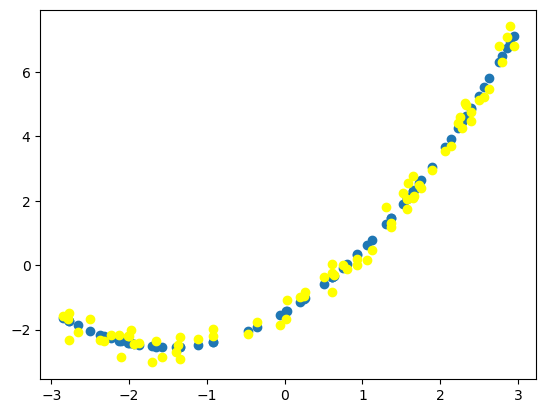

In [79]:
plt.scatter(x_train,regression_2.predict(x_train_poly))
plt.scatter(x_train,y_train,color='yellow')
plt.show()

In [80]:
#3 Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

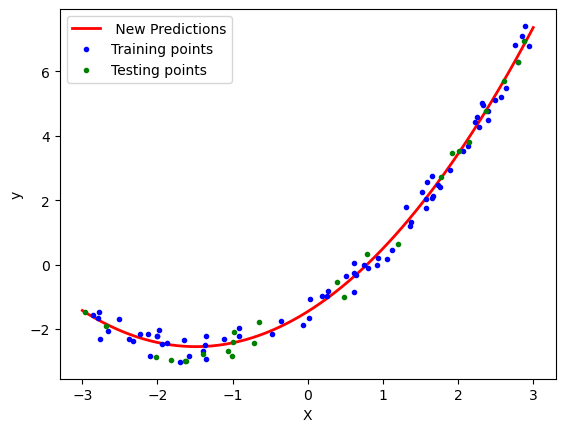

In [81]:
y_new = regression_2.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [84]:
from sklearn.pipeline import Pipeline

In [107]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(x_train,y_train) ## ploynomial and fit of linear regression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

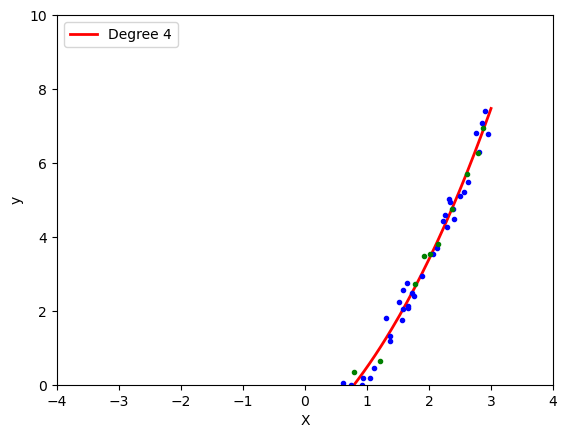

In [108]:
poly_regression(4)

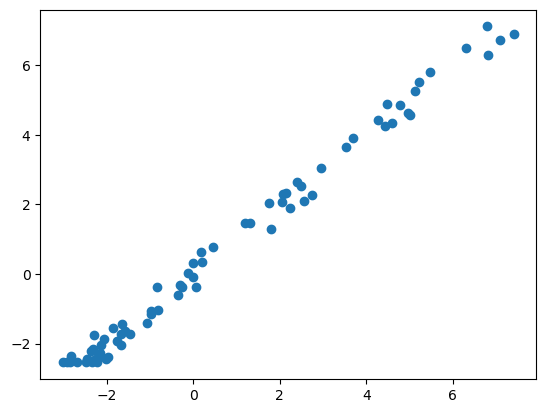

In [109]:
# random curiosity thing
from sklearn.metrics import r2_score
y_pre=regression_2.predict(x_train_poly)
r2_scoree=r2_score(y_train,y_pre)
r2_scoree
plt.scatter(y_train,y_pre)
plt.show()